In [1]:
% Start with initial setup
clear;
clc;
close all;
format bank;

% Define symbolic variables
syms theta1 theta2 d3 theta4 d1 a4 X_e Y_e Z_e X_c Y_c Z_c R P Y

%Joint Offset
d1 = 10;
a4 = 10;
a5 = 10;

X_e = 0;  % Target X position
Y_e = 30; % Target Y position
Z_e = 10;  % Target Z position
R = pi/2;
P = 0;
Y = pi/2;

In [2]:
%{
% Rotation matrices for roll, pitch, and yaw
R_x = [1, 0, 0;
       0, cos(R), -sin(R);
       0, sin(R), cos(R)];

R_y = [cos(P), 0, sin(P);
       0, 1, 0;
       -sin(P), 0, cos(P)];

R_z = [cos(Y), -sin(Y), 0;
       sin(Y), cos(Y), 0;
       0, 0, 1];

% Combined rotation matrix
R_xyz = R_z * R_y * R_x;
disp('Rotation Matrix (R_xyz):');
disp(R_xyz);
disp('Z-axis of End Effector (R_xyz(:,3)):');
disp(R_xyz(:,3));
% Position vector
d_xyz = [X_e; Y_e; Z_e];
disp('End Effector Position (d_xyz):');
disp(d_xyz);
% Final Transformation Matrix
T = [R_xyz, d_xyz; 0, 0, 0, 1];

% Display the result
disp('Transformation Matrix T:');
disp(T);
%}

In [3]:
% Define the DH Transformation Matrix
dh_transform_matrix = @(theta, alpha, a, d) [
    cos(theta), -sin(theta)*cos(alpha), sin(theta)*sin(alpha), a*cos(theta);
    sin(theta), cos(theta)*cos(alpha), -cos(theta)*sin(alpha), a*sin(theta);
    0, sin(alpha), cos(alpha), d;
    0, 0, 0, 1
];

In [4]:
% DH Table for the robotic arm (in radians)
DH_table = [
    theta1, d1, 0, -pi / 2;  % Joint 1
    theta2 + pi / 2, 0, 0, pi / 2;  % Joint 2
    pi, d3, 0, pi / 2;  % Joint 3
    theta4 + pi / 2, 0, a4, -pi / 2  % Joint 4
];

% Compute forward kinematics
T_total = eye(4);  % Start with identity matrix

% Multiply the individual transformation matrices
for i = 1:size(DH_table, 1)
    % Unpack the DH parameters for each joint
    theta = DH_table(i, 1);
    d = DH_table(i, 2);
    a = DH_table(i, 3);
    alpha = DH_table(i, 4);

    % Compute the transformation matrix for the joint
    T_joint = dh_transform_matrix(theta, alpha, a, d);

    % Multiply to get the total transformation matrix
    T_total = T_total * T_joint;
end

% Display the final transformation matrix
disp('Final Transformation Matrix T_total:');

Final Transformation Matrix T_total:

In [5]:
disp(T_total);

In [6]:
% Extract the rotation matrix (upper-left 3x3 of T_total)
R_matrix = T_total(1:3, 1:3);

% Extract the position vector (last column excluding the last element)
position_vector = T_total(1:3, 4);

% Display the rotation matrix and position vector
disp('Rotation Matrix:');

Rotation Matrix:

In [7]:
disp(R_matrix);

disp('Position Vector:');

Position Vector:

In [8]:
disp(position_vector);

In [9]:
T04 = [-0.1228    -0.7071   0.6964  12.06;
       -0.1228     0.7071   0.6964  12.06;
       -0.9848     0       -0.1736 -6.688;
        0          0        0       1]

T04 = 4x4
         -0.12         -0.71          0.70         12.06
         -0.12          0.71          0.70         12.06
         -0.98             0         -0.17         -6.69
             0             0             0          1.00

In [10]:

% Extract Rotation Matrix R04
R04 = T04(1:3, 1:3);

% Extract Position Vector P04
P04 = T04(1:3, 4);

% Display Results
disp('Rotation Matrix R04:');

Rotation Matrix R04:

In [11]:
disp(R04);

         -0.12         -0.71          0.70
         -0.12          0.71          0.70
         -0.98             0         -0.17

In [12]:

disp('Position Vector P04:');

Position Vector P04:

In [13]:
disp(P04);

         12.06
         12.06
         -6.69

In [14]:

%End Effector Position
X_e = P04(1)

X_e = 
         12.06

In [15]:
Y_e = P04(2)

Y_e = 
         12.06

In [16]:
Z_e = P04(3)

Z_e = 
         -6.69

In [17]:
% Define the wrist center calculation
% Extract the z-axis of the end effector frame
z_axis = R04(:, 1);

% Initialize the wrist center as the position vector
Wrist_Center = P04;

% Check each component of d_xyz and apply the condition based on sign
for i = 1:3
    %if d_xyz(i) > 0
        % If the component is positive, subtract a4 * z_axis
        %Wrist_Center(i) = Wrist_Center(i) - a4 * z_axis(i);
    %elseif d_xyz(i) < 0
        % If the component is negative, add a4 * z_axis
    Wrist_Center(i) = Wrist_Center(i) - a4 * z_axis(i);
    %end
end

% Display the wrist center
disp('Wrist Center:');

Wrist Center:

In [18]:
disp(Wrist_Center);

         13.29
         13.29
          3.16

In [19]:

% Extract individual components
X_c = Wrist_Center(1);
Y_c = Wrist_Center(2);
Z_c = Wrist_Center(3);

disp(['X_c: ', num2str(X_c)]);

X_c: 13.288

In [20]:
disp(['Y_c: ', num2str(Y_c)]);

Y_c: 13.288

In [21]:
disp(['Z_c: ', num2str(Z_c)]);

Z_c: 3.16

In [22]:

% Calculate theta_1, theta_2, and d3 using inverse kinematics formulas
theta_1 = atan2(Y_e, X_e);
disp('Theta1:');

Theta1:

In [23]:
disp(theta_1);

          0.79

In [24]:

r = sqrt(X_c^2 + Y_c^2);  % Horizontal distance in XY-plane
theta_2 = -atan2(Z_c - d1, r) ;  % Shoulder angle
d3 = sqrt(X_c^2 + Y_c^2 + (Z_c - d1)^2);  % Prismatic joint extension
disp('Theta2:');

Theta2:

In [25]:
disp(theta_2);

          0.35

In [26]:
disp('D3:');

D3:

In [27]:
disp(d3);

         20.00

In [28]:
DH_table = [
    theta1, d1, 0, -pi / 2;  % Joint 1
    theta2 + pi / 2, 0, 0, pi / 2;  % Joint 2
    pi, d3, 0, pi / 2;  % Joint 3
    pi / 2 + pi / 2, 0, a4, -pi / 2  % Joint 4
]; %set initial theta_4 = pi/2

% Compute forward kinematics with the calculated joint values (set theta_4 = 0)
T_total = eye(4);  % Start with identity matrix

% Multiply the individual transformation matrices (substitute computed values)
for i = 1:3  % Only use first three joints (no theta_4 contribution)
    % Unpack the DH parameters for each joint
    theta = DH_table(i, 1);
    d = DH_table(i, 2);
    a = DH_table(i, 3);
    alpha = DH_table(i, 4);

    % Substitute the computed joint values
    if i == 1
        theta = theta_1;  % Set theta_1
    elseif i == 2
        theta = theta_2;  % Set theta_2
    elseif i == 3
        d = d3;  % Set d3 (prismatic joint)
    end

    % Compute the transformation matrix for the joint
    T_joint = dh_transform_matrix(theta, alpha, a, d);

    % Multiply to get the total transformation matrix
    T_total = T_total * T_joint;
end

% Extract the position vector (last column excluding the last element)
position_vector_zero_theta4 = T_total(1:3, 4);

% Extract the rotation matrix (upper-left 3x3 of T_total)
R_matrix_zero_theta4 = T_total(1:3, 1:3);

% Display the position vector and rotation matrix when theta_4 = 0
disp('Position Vector (theta_4 = 0):');

Position Vector (theta_4 = 0):

In [29]:
disp(position_vector_zero_theta4);

disp('Rotation Matrix (theta_4 = 0):');

Rotation Matrix (theta_4 = 0):

In [30]:
disp(R_matrix_zero_theta4);

% Define wrist center calculation when theta_4 = 0
% Wrist Center: W = P_e - a4 * R_4_0 * [0, 0, 1]
R_4_0_Z = R_matrix_zero_theta4(:, 3);  % Extract the third column (Z-axis direction)
Wrist_Center = position_vector_zero_theta4 - a4 * R_4_0_Z;

% Display wrist center
disp('Wrist Center (theta_4 = 0):');

Wrist Center (theta_4 = 0):

In [31]:
disp(Wrist_Center);

%Solve for D
D = ((Z_e - d1)^2 + X_e^2 + Y_e^2 - d3^2 - a4^2)/(2*d3*a4);

% Calculate the Z-position for theta_4 = 0 (end-effector Z position)
Z_no_theta4 = position_vector_zero_theta4(3);

% Check if the Z-position when theta_4 = 0 is less or greater than Z_e
if round(Z_no_theta4,2) > Z_e
    theta_4 = atan(sqrt((1 - (D)^2) / D));  % If Z-position is less than Z_e, theta_4 is positive
else
    theta_4 = -atan(sqrt((1 - (D)^2) / D));  % If Z-position is more than Z_e, theta_4 is negative
end

disp('theta_4 (adjusted):');

theta_4 (adjusted):

In [32]:
disp(theta_4);

1.17

In [33]:
%theta5
theta_5 = pi/2-theta_4-theta_2

theta_5 = 
          0.05

In [34]:
%%***************** Simulation ****************%%

In [35]:
%Define DH Matrix
    DH = [
        theta_1     ,  d1,   0,   -pi/2;  % Joint 1
        theta_2+pi/2,   0,   0,    pi/2;  % Joint 2
                   0,  d3,   0,   -pi/2;  % Joint 3 (Prismatic)
        theta_4-pi/2,   0,   a4,      0;   % Joint 4
        theta_5     ,   0,   a5,      0;
    ];

In [36]:
% Create robot link use Link([theta d a alpha sigma=1 prismatic, =0 revolute])
Lx(1) = Link([theta_1     d1   0 -pi/2 0])

 
Lx = 
Revolute(std): theta=q, d=10, a=0, alpha=-1.5708, offset=0

In [37]:
Lx(1).qlim = [-pi/2 pi/2];
Lx(2) = Link([theta_2+pi/2 0   0  pi/2 0])

 
Lx = 
Revolute(std):  theta=q1   d=10          a=0           alpha=-1.571      offset=0          
Revolute(std):  theta=q2   d=0           a=0           alpha=1.571       offset=0

In [38]:
Lx(2).qlim = [0 pi/2];
Lx(3) = Link([0 d3 0 -pi/2 1])   % Prismatic Joint

 
Lx = 
Revolute(std):  theta=q1   d=10          a=0           alpha=-1.571      offset=0          
Revolute(std):  theta=q2   d=0           a=0           alpha=1.571       offset=0          
Prismatic(std): theta=0             d=q3 a=0           alpha=-1.571      offset=0

In [39]:
Lx(3).qlim = [0 d3];
Lx(4) = Link([theta_4-pi   0  a4     0 0])

 
Lx = 
Revolute(std):  theta=q1   d=10          a=0           alpha=-1.571      offset=0          
Revolute(std):  theta=q2   d=0           a=0           alpha=1.571       offset=0          
Prismatic(std): theta=0             d=q3 a=0           alpha=-1.571      offset=0          
Revolute(std):  theta=q4   d=0           a=10          alpha=0           offset=0

In [40]:
Lx(4).qlim = [-pi/2 pi/2];
Lx(5) = Link([theta_5      0  a5     0 0])

 
Lx = 
Revolute(std):  theta=q1   d=10          a=0           alpha=-1.571      offset=0          
Revolute(std):  theta=q2   d=0           a=0           alpha=1.571       offset=0          
Prismatic(std): theta=0             d=q3 a=0           alpha=-1.571      offset=0          
Revolute(std):  theta=q4   d=0           a=10          alpha=0           offset=0          
Revolute(std):  theta=q5   d=0           a=10          alpha=0           offset=0

In [41]:
Lx(5).qlim = [-pi/2 pi/2];

In [42]:
disp([theta_1 theta_2 d3 theta_4 theta_5])

          0.79          0.35         20.00          1.17          0.05

In [43]:
% === Create SerialLink Robot ===
R = SerialLink(Lx, 'name', 'MyRRPRR');

% === Example FK and Plot ===
q_init = [0, pi/2, 0, -pi/2, 0];
T = R.fkine(q_init);
disp('End-Effector Pose:');

End-Effector Pose:

In [44]:
disp(T);

    1         0         0        20
    0 6.123e-17         1 7.499e-32
    0        -1 6.123e-17        10
    0         0         0         1


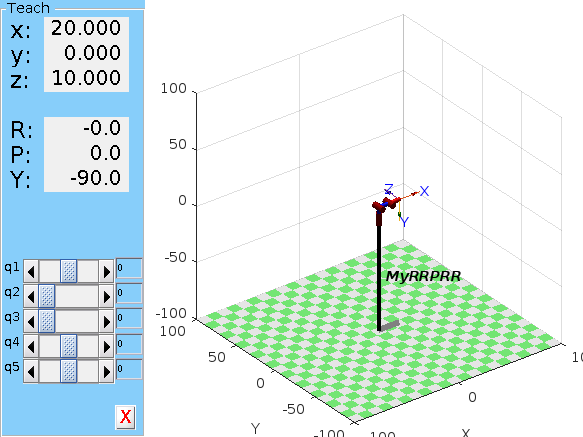

In [45]:

% === Visualize the Robot ===
R.plot(q_init, 'workspace', [-100 100 -100 100 -100 100]);
R.teach();


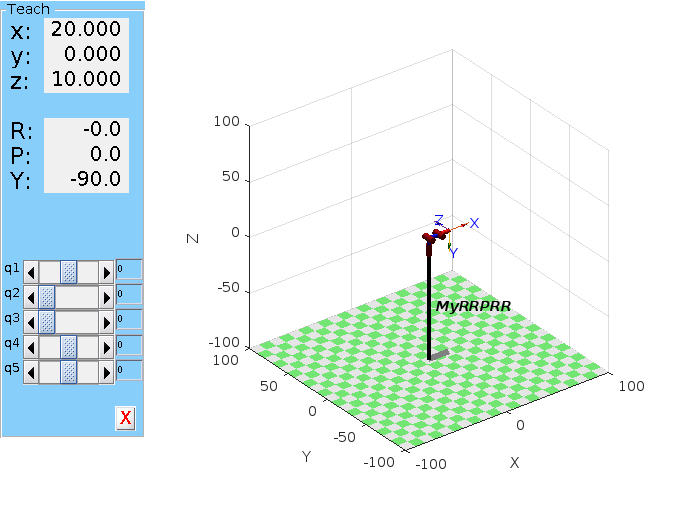

In [46]:
% Initial Posture
for theta1_i = 0:0.1:0
    R.plot([theta1_i 0 0 0 0],'workspace',[-100 100 -100 100 -100 100])
    drawnow
end

for theta5_i = 0:0.1:0
    R.plot([theta1_i 0 0 0 theta5_i],'workspace',[-100 100 -100 100 -100 100])
    drawnow
end

for theta4_i = 0:-0.1:-pi/2
    R.plot([theta1_i 0 0 theta4_i theta5_i],'workspace',[-100 100 -100 100 -100 100])
    drawnow
end

for theta2_i = 0:0.1:pi/2
    R.plot([theta1_i theta2_i 0 theta4_i theta5_i],'workspace',[-100 100 -100 100 -100 100])
    drawnow
end

for d3_i = 0:1:0
    R.plot([theta1_i theta2_i d3_i theta4_i theta5_i],'workspace',[-100 100 -100 100 -100 100])
    drawnow
end

In [47]:
%%************** Cubic Trajectory ******************55

In [48]:
% Trajectory path planning using cubic polynomial
tf = 2;
dt = 0.1;
t = 0:dt:tf;

In [49]:
%% Cubic Trajectory Function
cubic = @(q0, dq, t, tf) deal(...
    q0 + 3*dq*(t.^2)/(tf^2) - 2*dq*(t.^3)/(tf^3), ...         % position
    6*dq*t/(tf^2) - 6*dq*(t.^2)/(tf^3), ...                   % velocity
    6*dq/(tf^2) - 12*dq*t/(tf^3));                            % acceleration


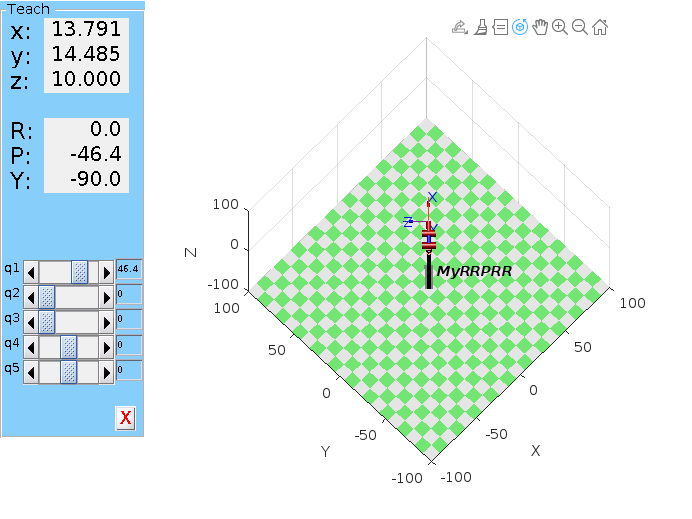

In [50]:
%% --- Theta1 ---
[theta1_traj, theta1_vel, theta1_acc] = cubic(theta1_i, theta_1, t, tf);

for i = 1:length(t)
    theta1 = theta1_traj(i);
    R.plot([theta1 theta2_i d3_i theta4_i theta5_i],'workspace',[-100 100 -100 100 -100 100])
    drawnow
end


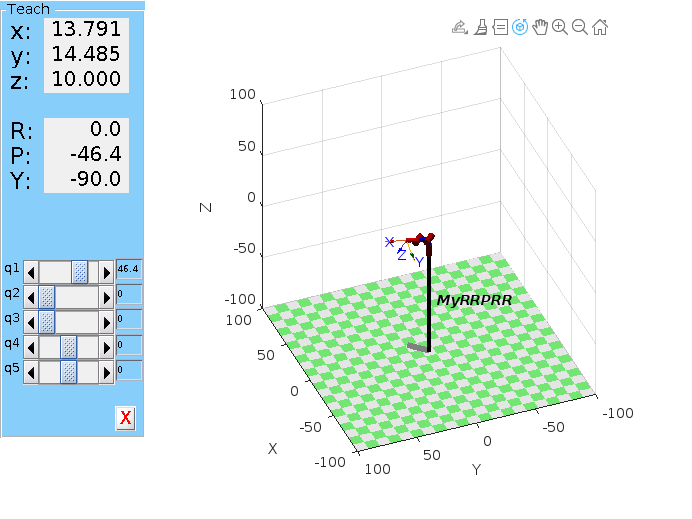

In [51]:
%% --- Theta2 ---
[theta2_traj, theta2_vel, theta2_acc] = cubic(theta2_i, theta_2, t, tf);

for i = 1:length(t)
    theta2 = theta2_traj(i);
    R.plot([theta1 theta2 d3_i theta4_i theta5_i],'workspace',[-100 100 -100 100 -100 100])
    drawnow
end


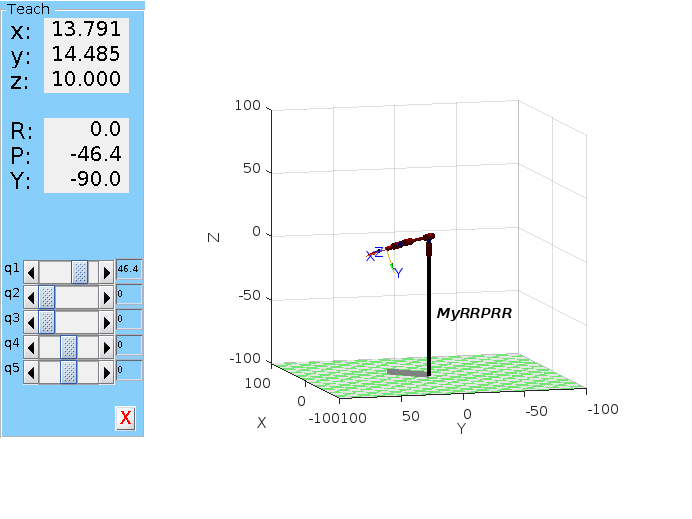

In [52]:
%% --- d3 ---
[ d3_traj, d3_vel, d3_acc ] = cubic(d3_i, d3 - d3_i, t, tf);

for i = 1:length(t)
    d3_f = d3_traj(i);
    R.plot([theta1 theta2 d3_f theta4_i theta5_i],'workspace',[-100 100 -100 100 -100 100])
    drawnow
end


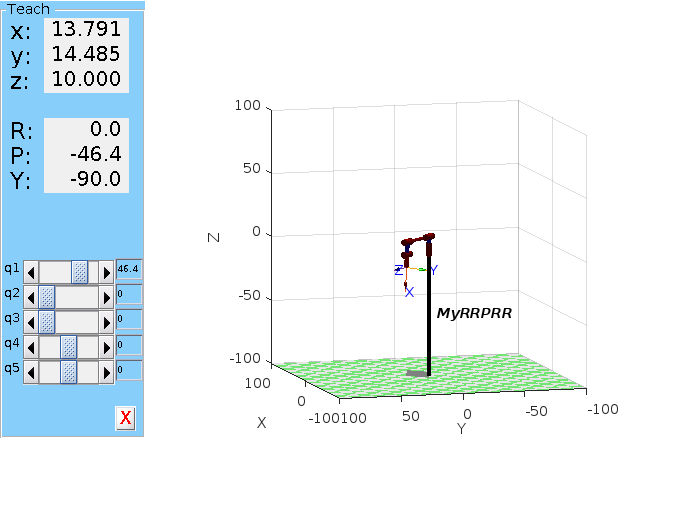

In [53]:
%% --- Theta4 ---
[theta4_traj, theta4_vel, theta4_acc] = cubic(theta4_i, theta_4, t, tf);

for i = 1:length(t)
    theta4 = theta4_traj(i);
    R.plot([theta1 theta2 d3_f theta4 theta5_i],'workspace',[-100 100 -100 100 -100 100])
    drawnow
end


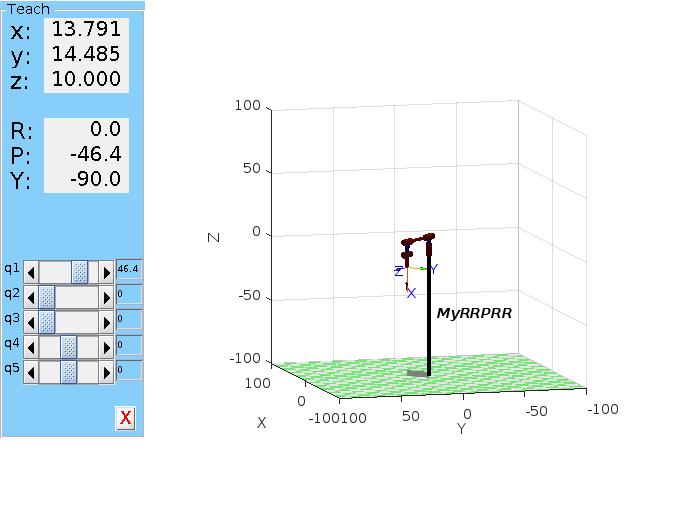

In [54]:
%% --- Theta5 ---
[theta5_traj, theta5_vel, theta5_acc] = cubic(theta5_i, theta_5, t, tf);

for i = 1:length(t)
    theta5 = theta5_traj(i);
    R.plot([theta1 theta2 d3_f theta4 theta5],'workspace',[-100 100 -100 100 -100 100])
    drawnow
end


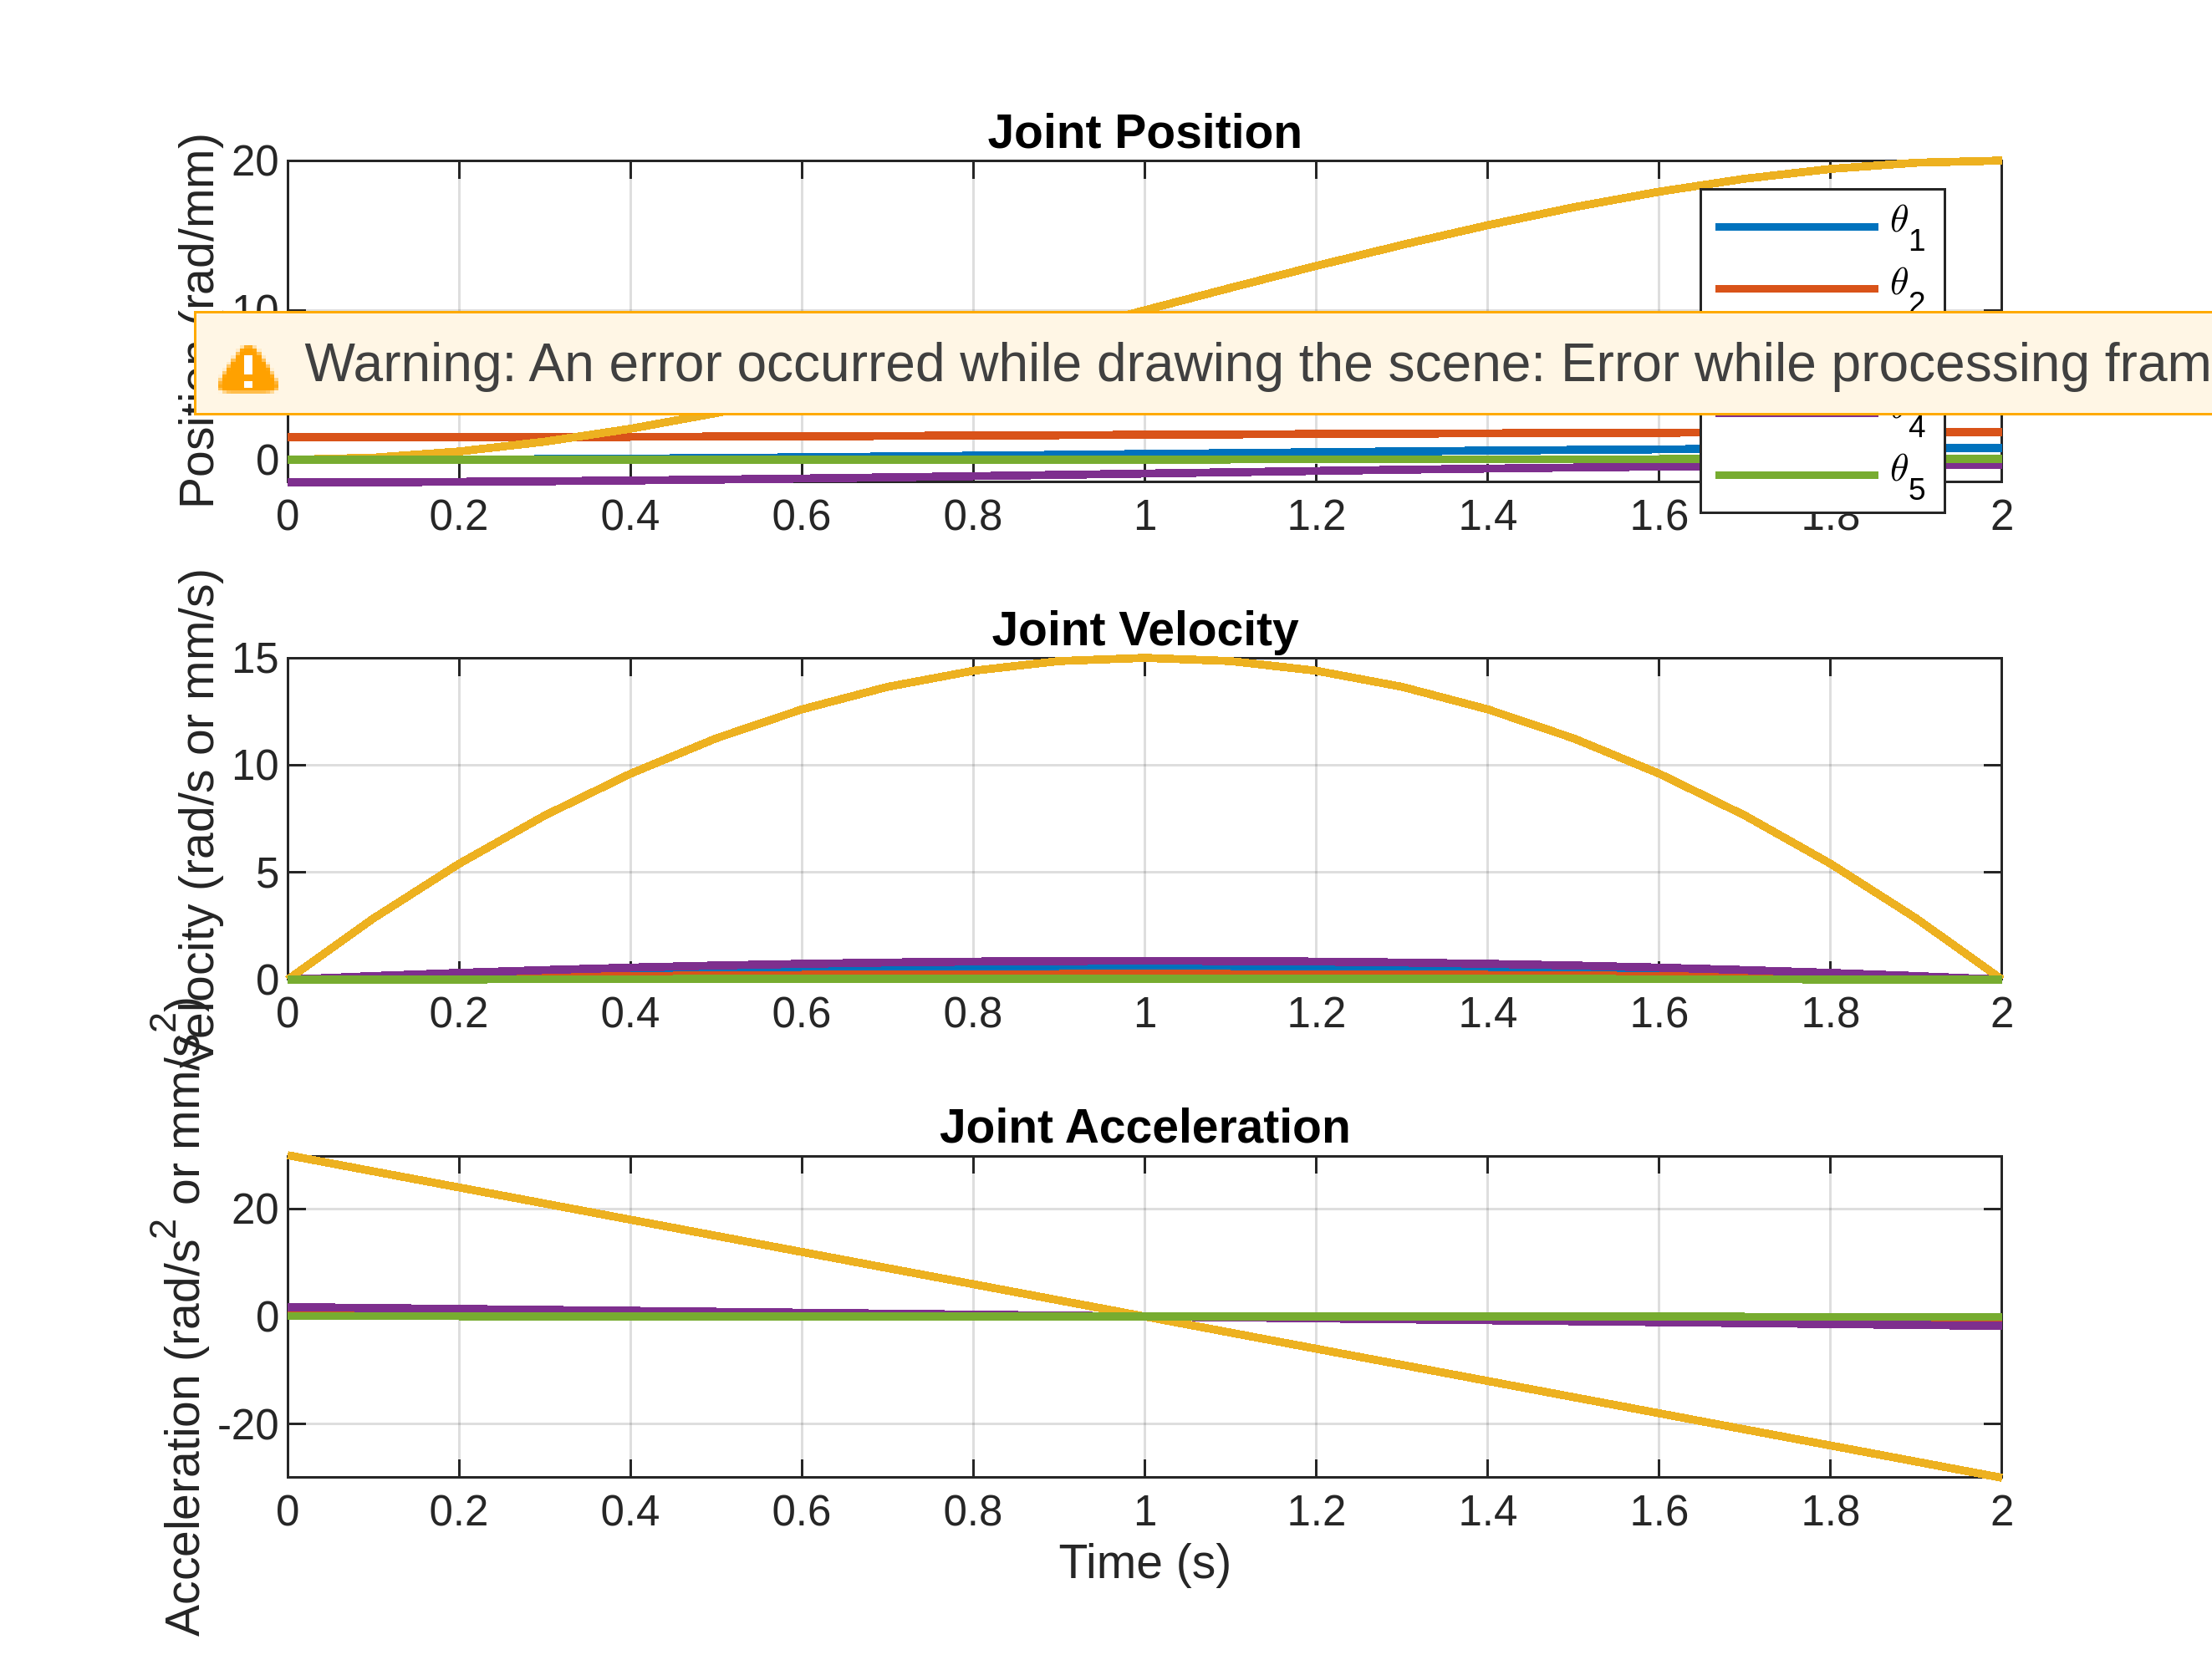

In [55]:
%% --- Plot All Joint Trajectories ---
figure('Name','Joint Trajectories','NumberTitle','off')

subplot(3,1,1)
plot(t, theta1_traj, t, theta2_traj, t, d3_traj, t, theta4_traj, t, theta5_traj,'LineWidth', 1.5)
title('Joint Position')
ylabel('Position (rad/mm)')
legend('\theta_1', '\theta_2', 'd_3', '\theta_4', '\theta_5')
grid on

subplot(3,1,2)
plot(t, theta1_vel, t, theta2_vel, t, d3_vel, t, theta4_vel, t, theta5_vel,'LineWidth', 1.5)
title('Joint Velocity')
ylabel('Velocity (rad/s or mm/s)')
grid on

subplot(3,1,3)
plot(t, theta1_acc, t, theta2_acc, t, d3_acc, t, theta4_acc, t, theta5_acc,'LineWidth', 1.5)
title('Joint Acceleration')
ylabel('Acceleration (rad/s^2 or mm/s^2)')
xlabel('Time (s)')
grid on


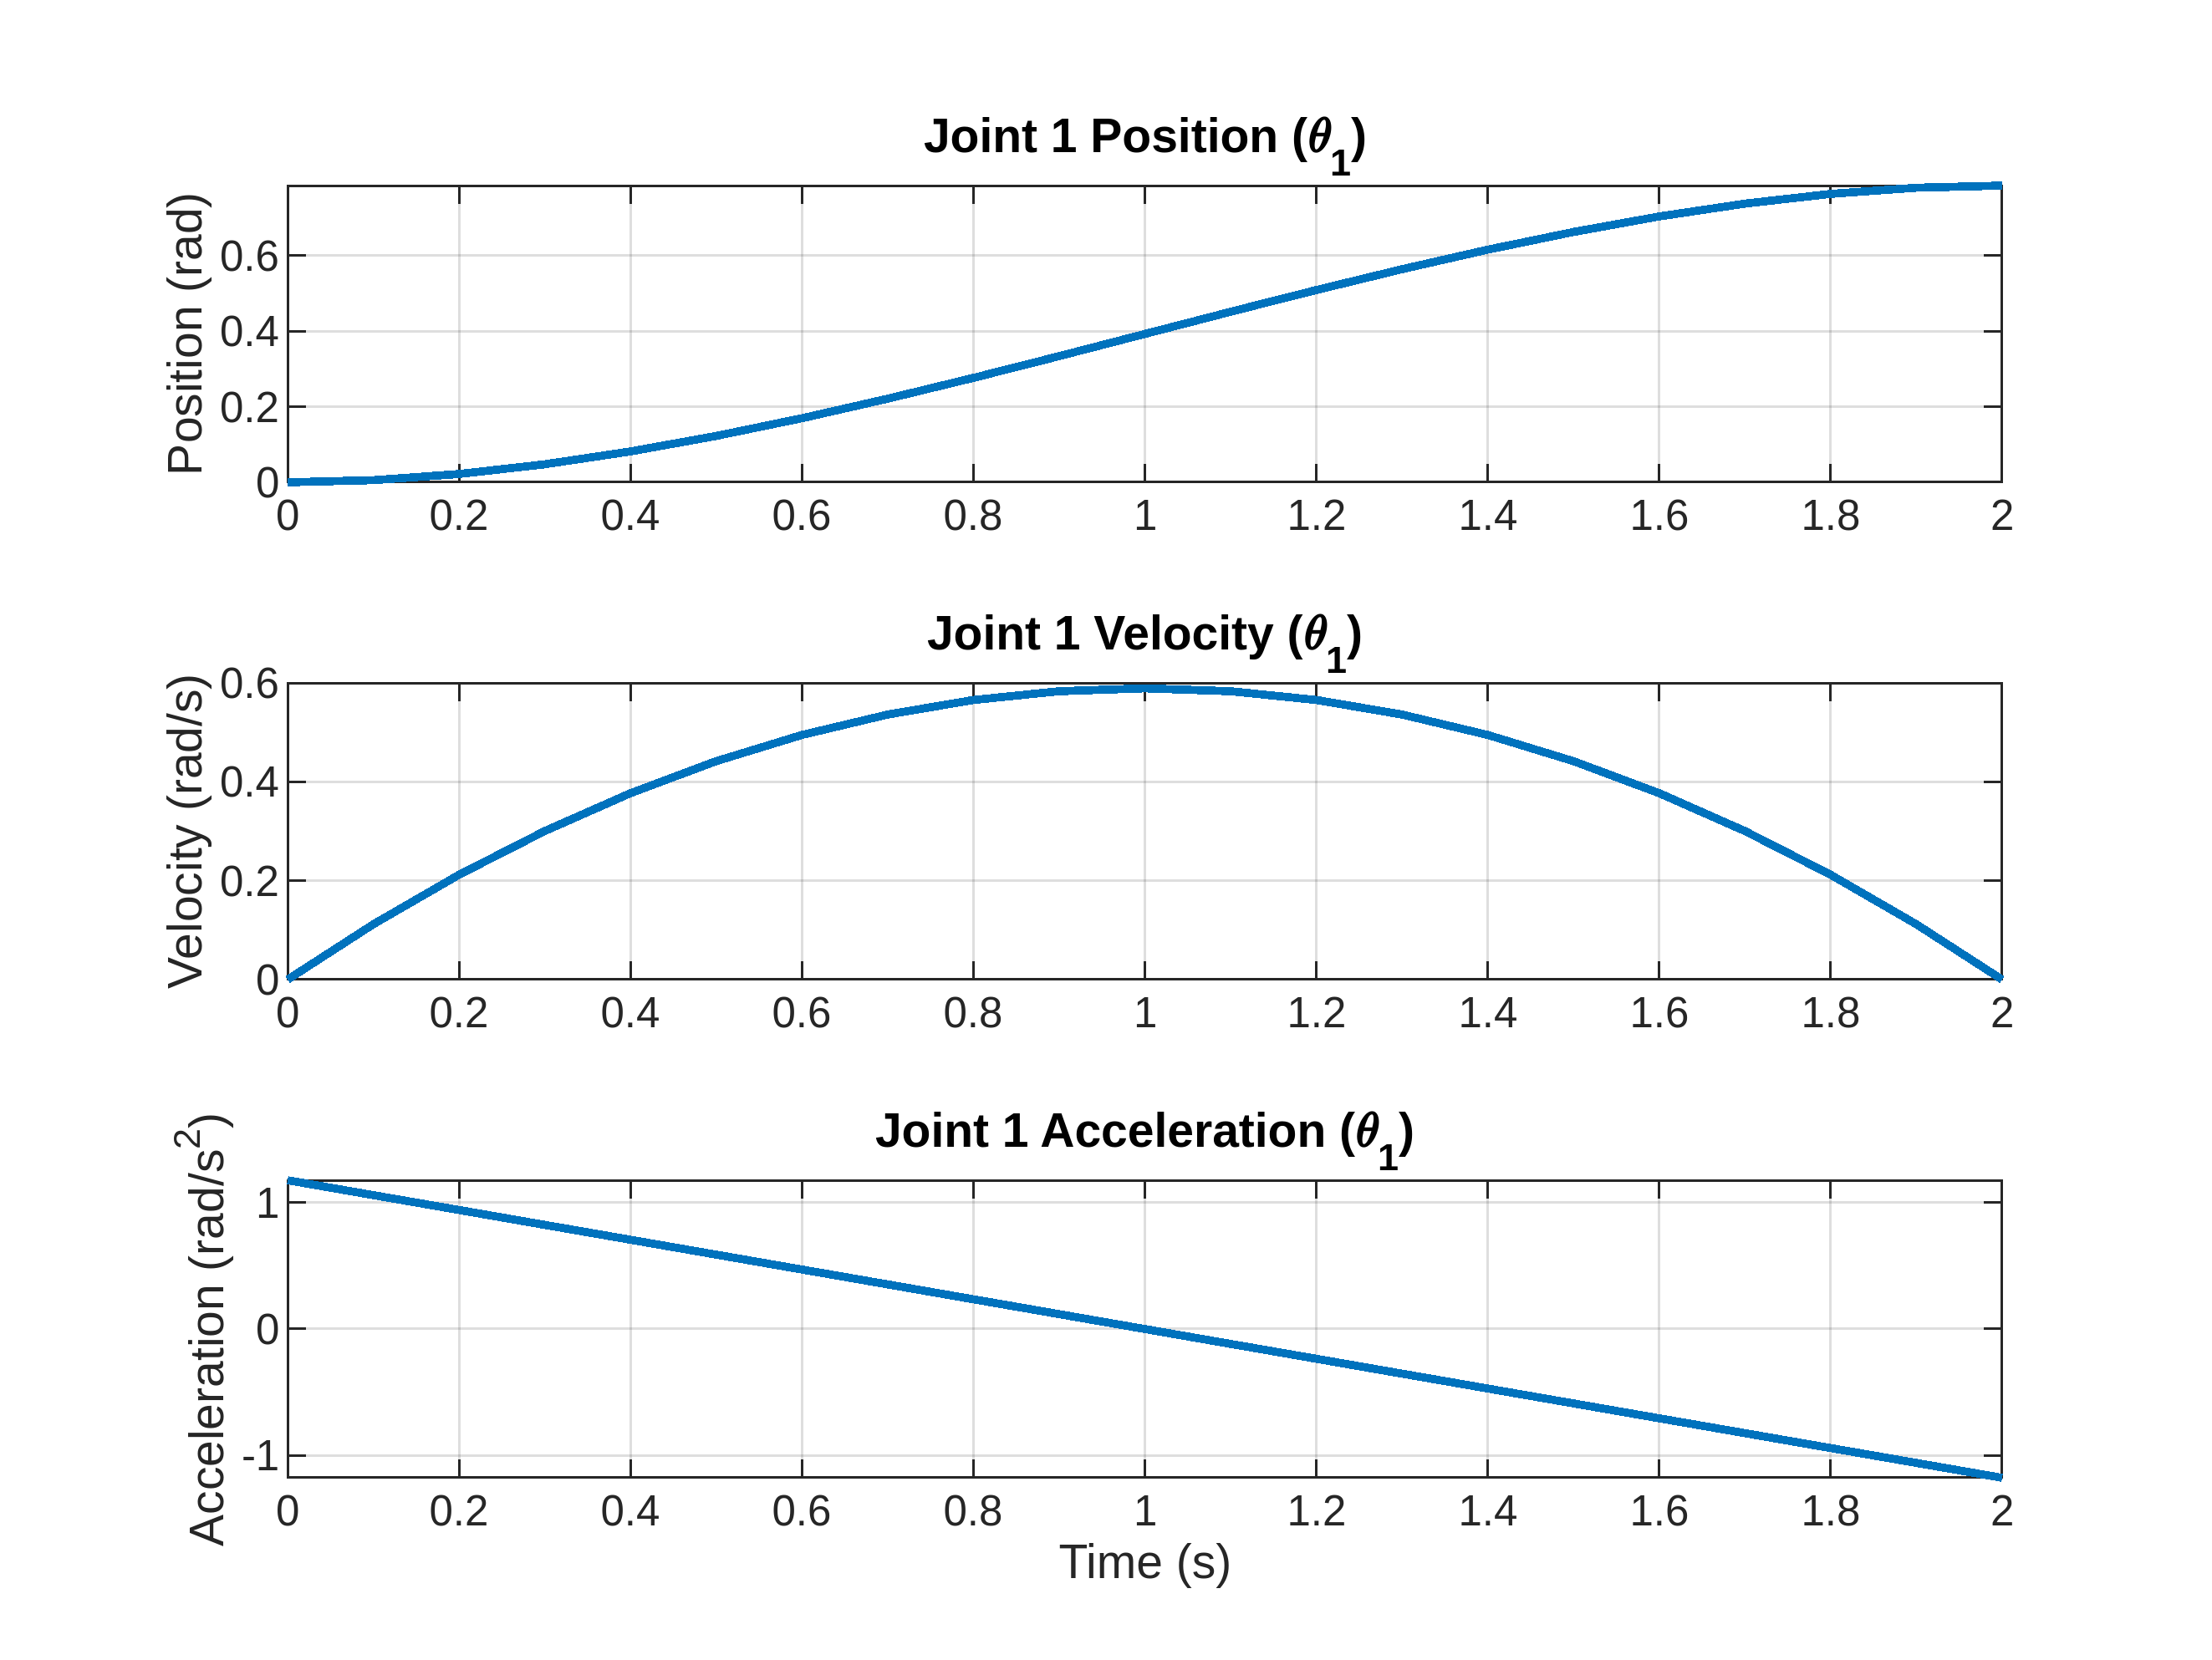

In [56]:
%% --- Plot Joint 1 (Theta1) ---
figure('Name','Joint 1 Trajectory','NumberTitle','off')

subplot(3,1,1)
plot(t, theta1_traj, 'LineWidth', 1.5)
title('Joint 1 Position (\theta_1)')
ylabel('Position (rad)')
grid on

subplot(3,1,2)
plot(t, theta1_vel, 'LineWidth', 1.5)
title('Joint 1 Velocity (\theta_1)')
ylabel('Velocity (rad/s)')
grid on

subplot(3,1,3)
plot(t, theta1_acc, 'LineWidth', 1.5)
title('Joint 1 Acceleration (\theta_1)')
ylabel('Acceleration (rad/s^2)')
xlabel('Time (s)')
grid on


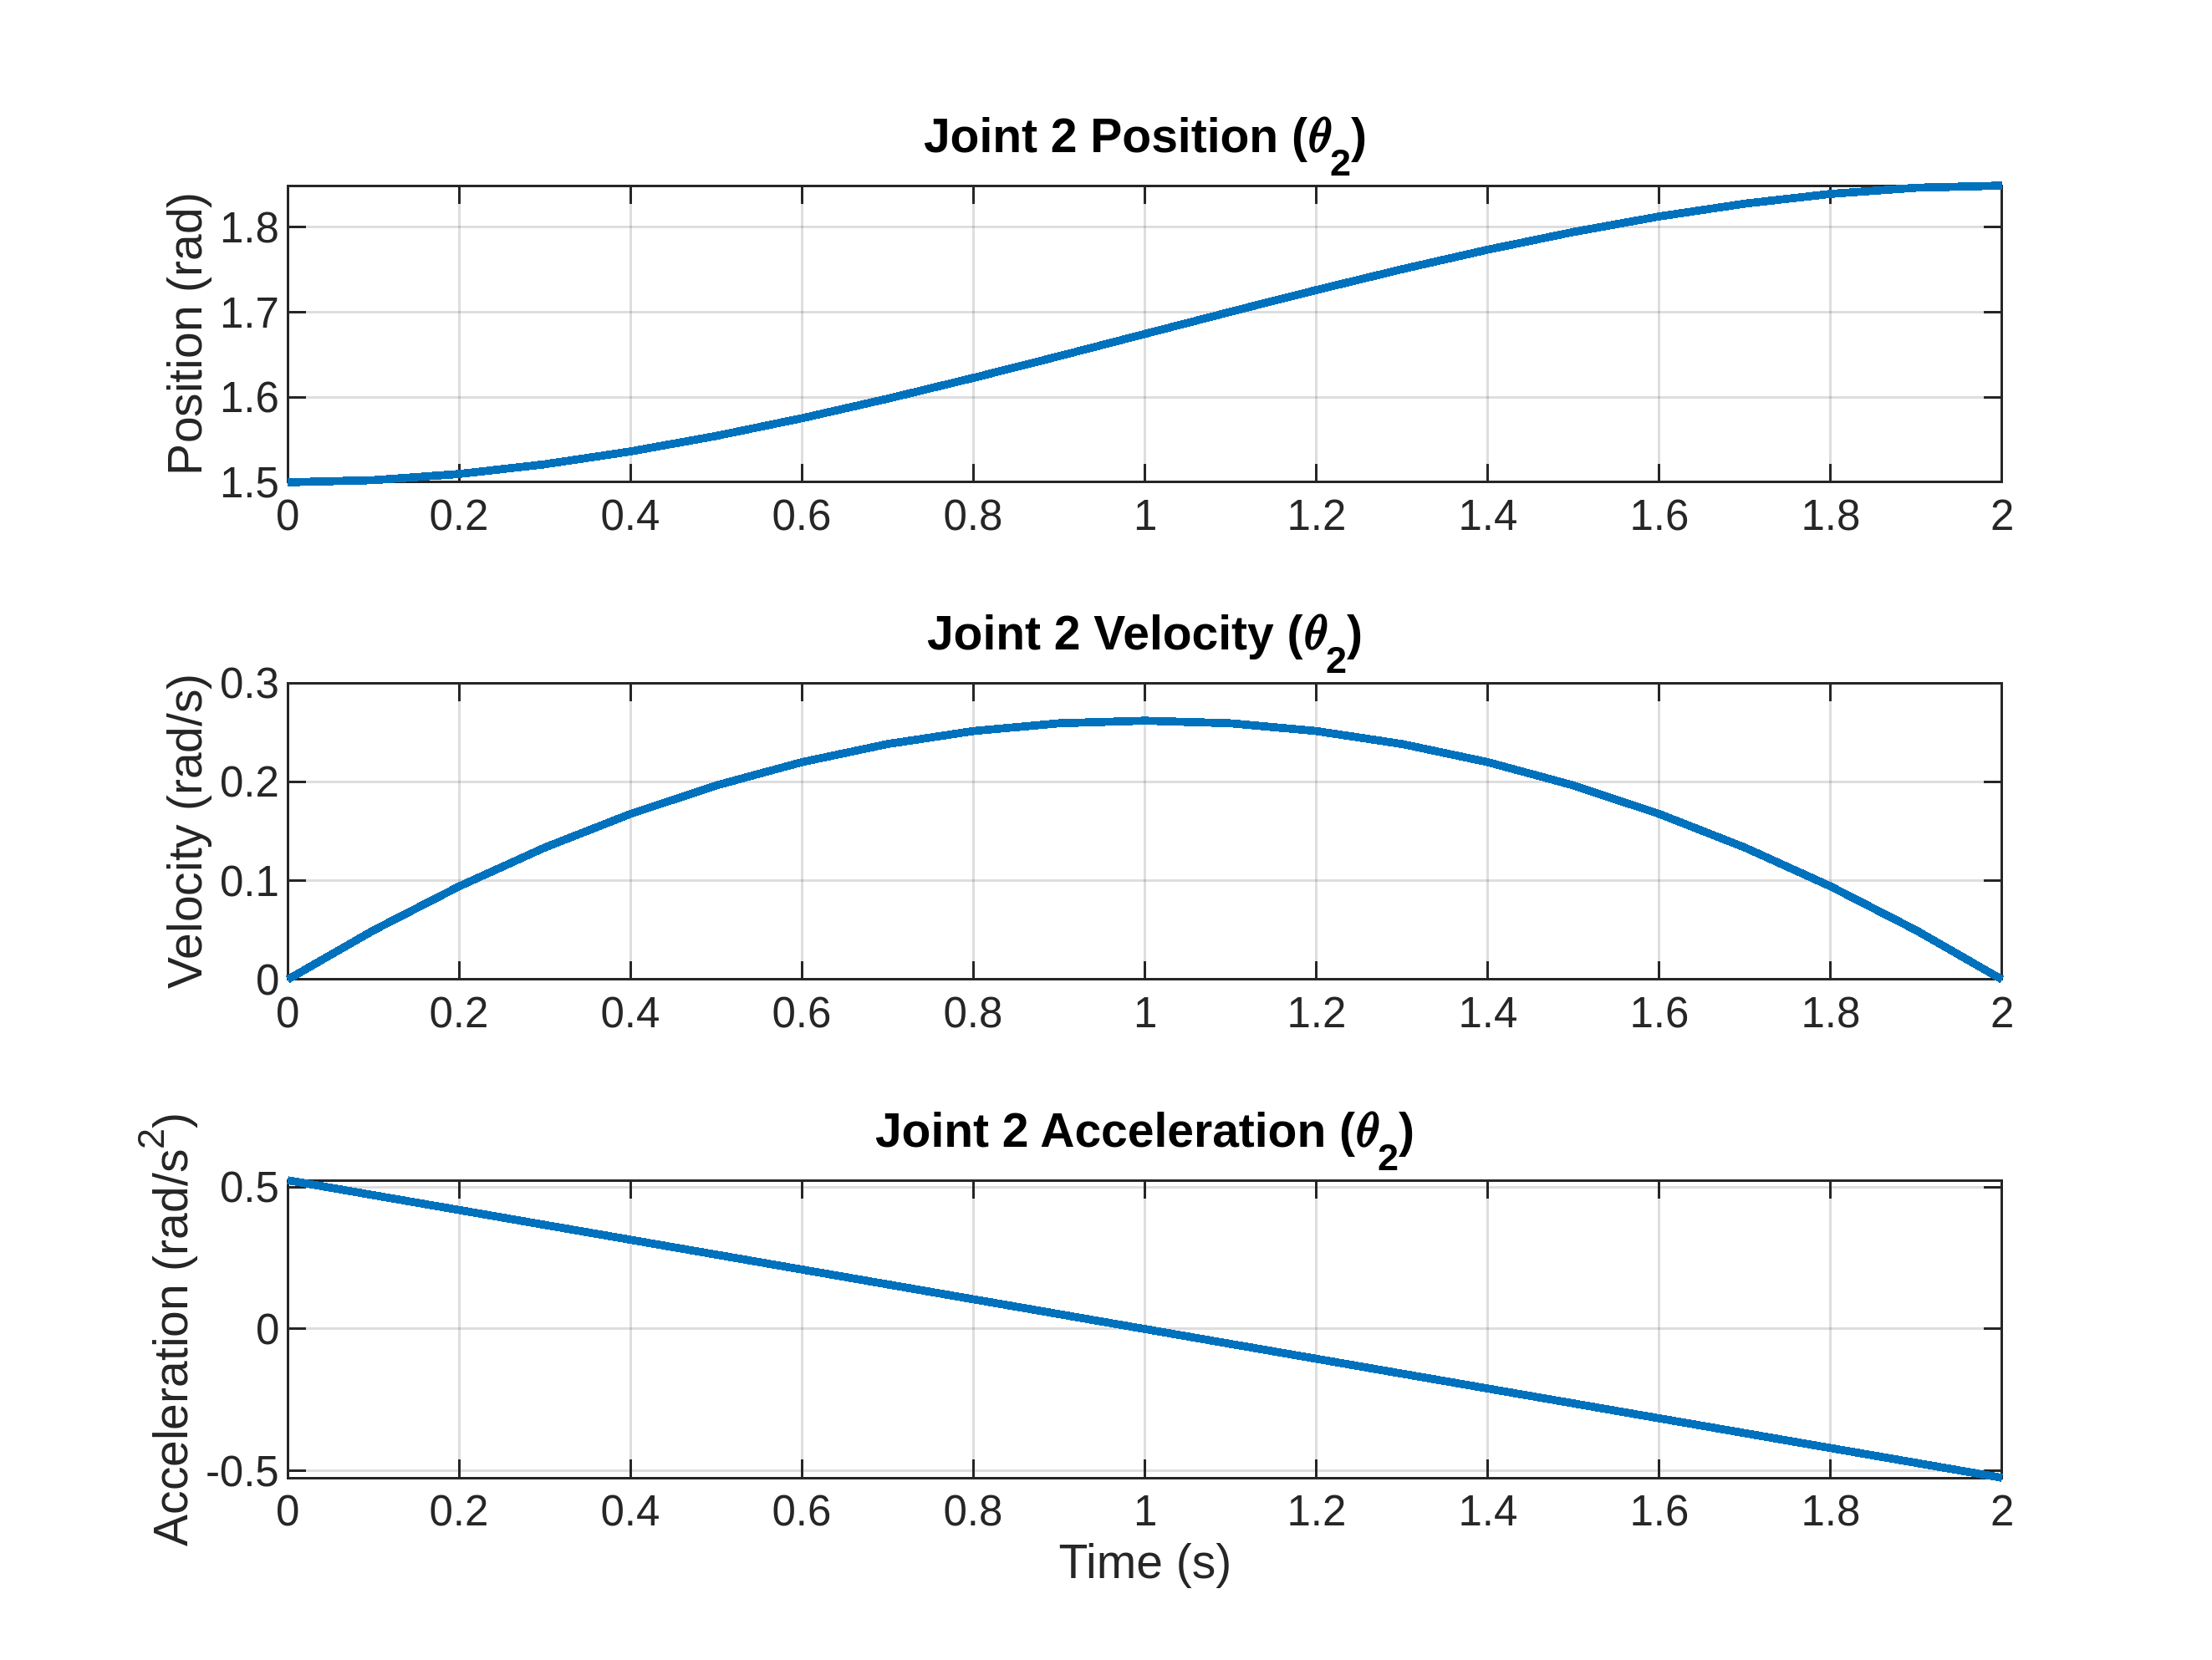

In [57]:
%% --- Plot Joint 2 (Theta2) ---
figure('Name','Joint 2 Trajectory','NumberTitle','off')

subplot(3,1,1)
plot(t, theta2_traj, 'LineWidth', 1.5)
title('Joint 2 Position (\theta_2)')
ylabel('Position (rad)')
grid on

subplot(3,1,2)
plot(t, theta2_vel, 'LineWidth', 1.5)
title('Joint 2 Velocity (\theta_2)')
ylabel('Velocity (rad/s)')
grid on

subplot(3,1,3)
plot(t, theta2_acc, 'LineWidth', 1.5)
title('Joint 2 Acceleration (\theta_2)')
ylabel('Acceleration (rad/s^2)')
xlabel('Time (s)')
grid on


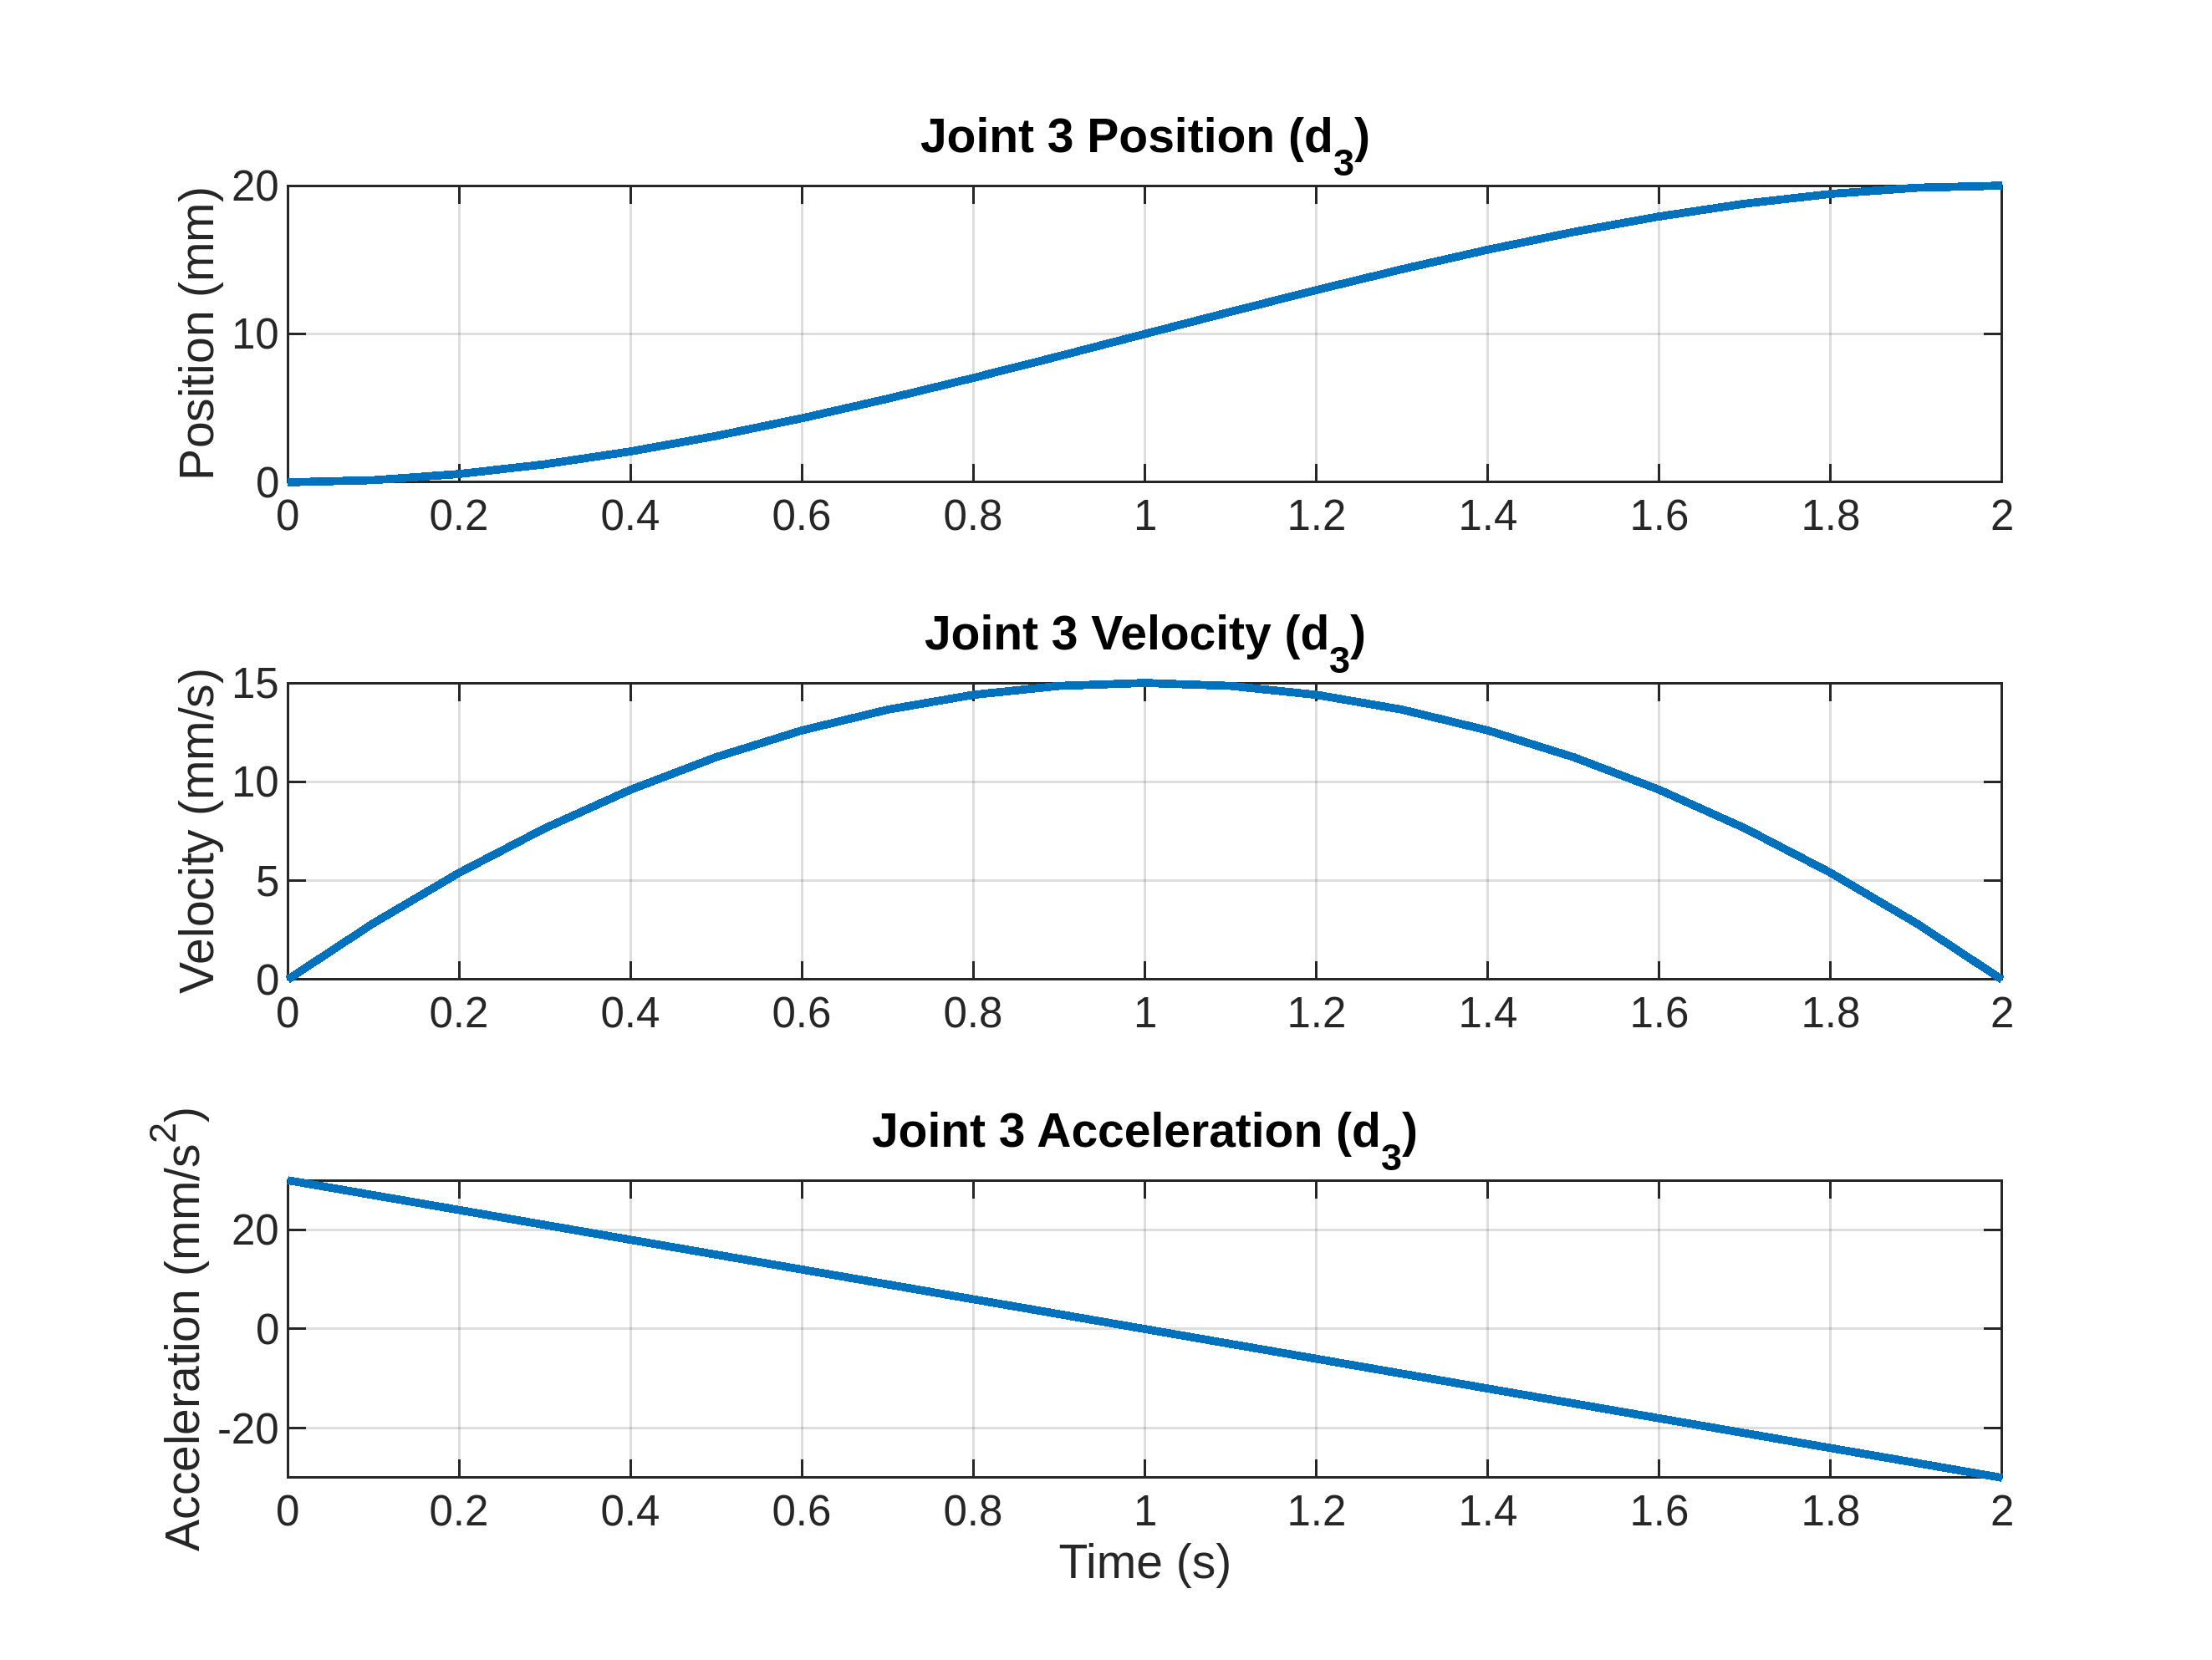

In [58]:
%% --- Plot Joint 3 (d3) ---
figure('Name','Joint 3 Trajectory','NumberTitle','off')

subplot(3,1,1)
plot(t, d3_traj, 'LineWidth', 1.5)
title('Joint 3 Position (d_3)')
ylabel('Position (mm)')
grid on

subplot(3,1,2)
plot(t, d3_vel, 'LineWidth', 1.5)
title('Joint 3 Velocity (d_3)')
ylabel('Velocity (mm/s)')
grid on

subplot(3,1,3)
plot(t, d3_acc, 'LineWidth', 1.5)
title('Joint 3 Acceleration (d_3)')
ylabel('Acceleration (mm/s^2)')
xlabel('Time (s)')
grid on


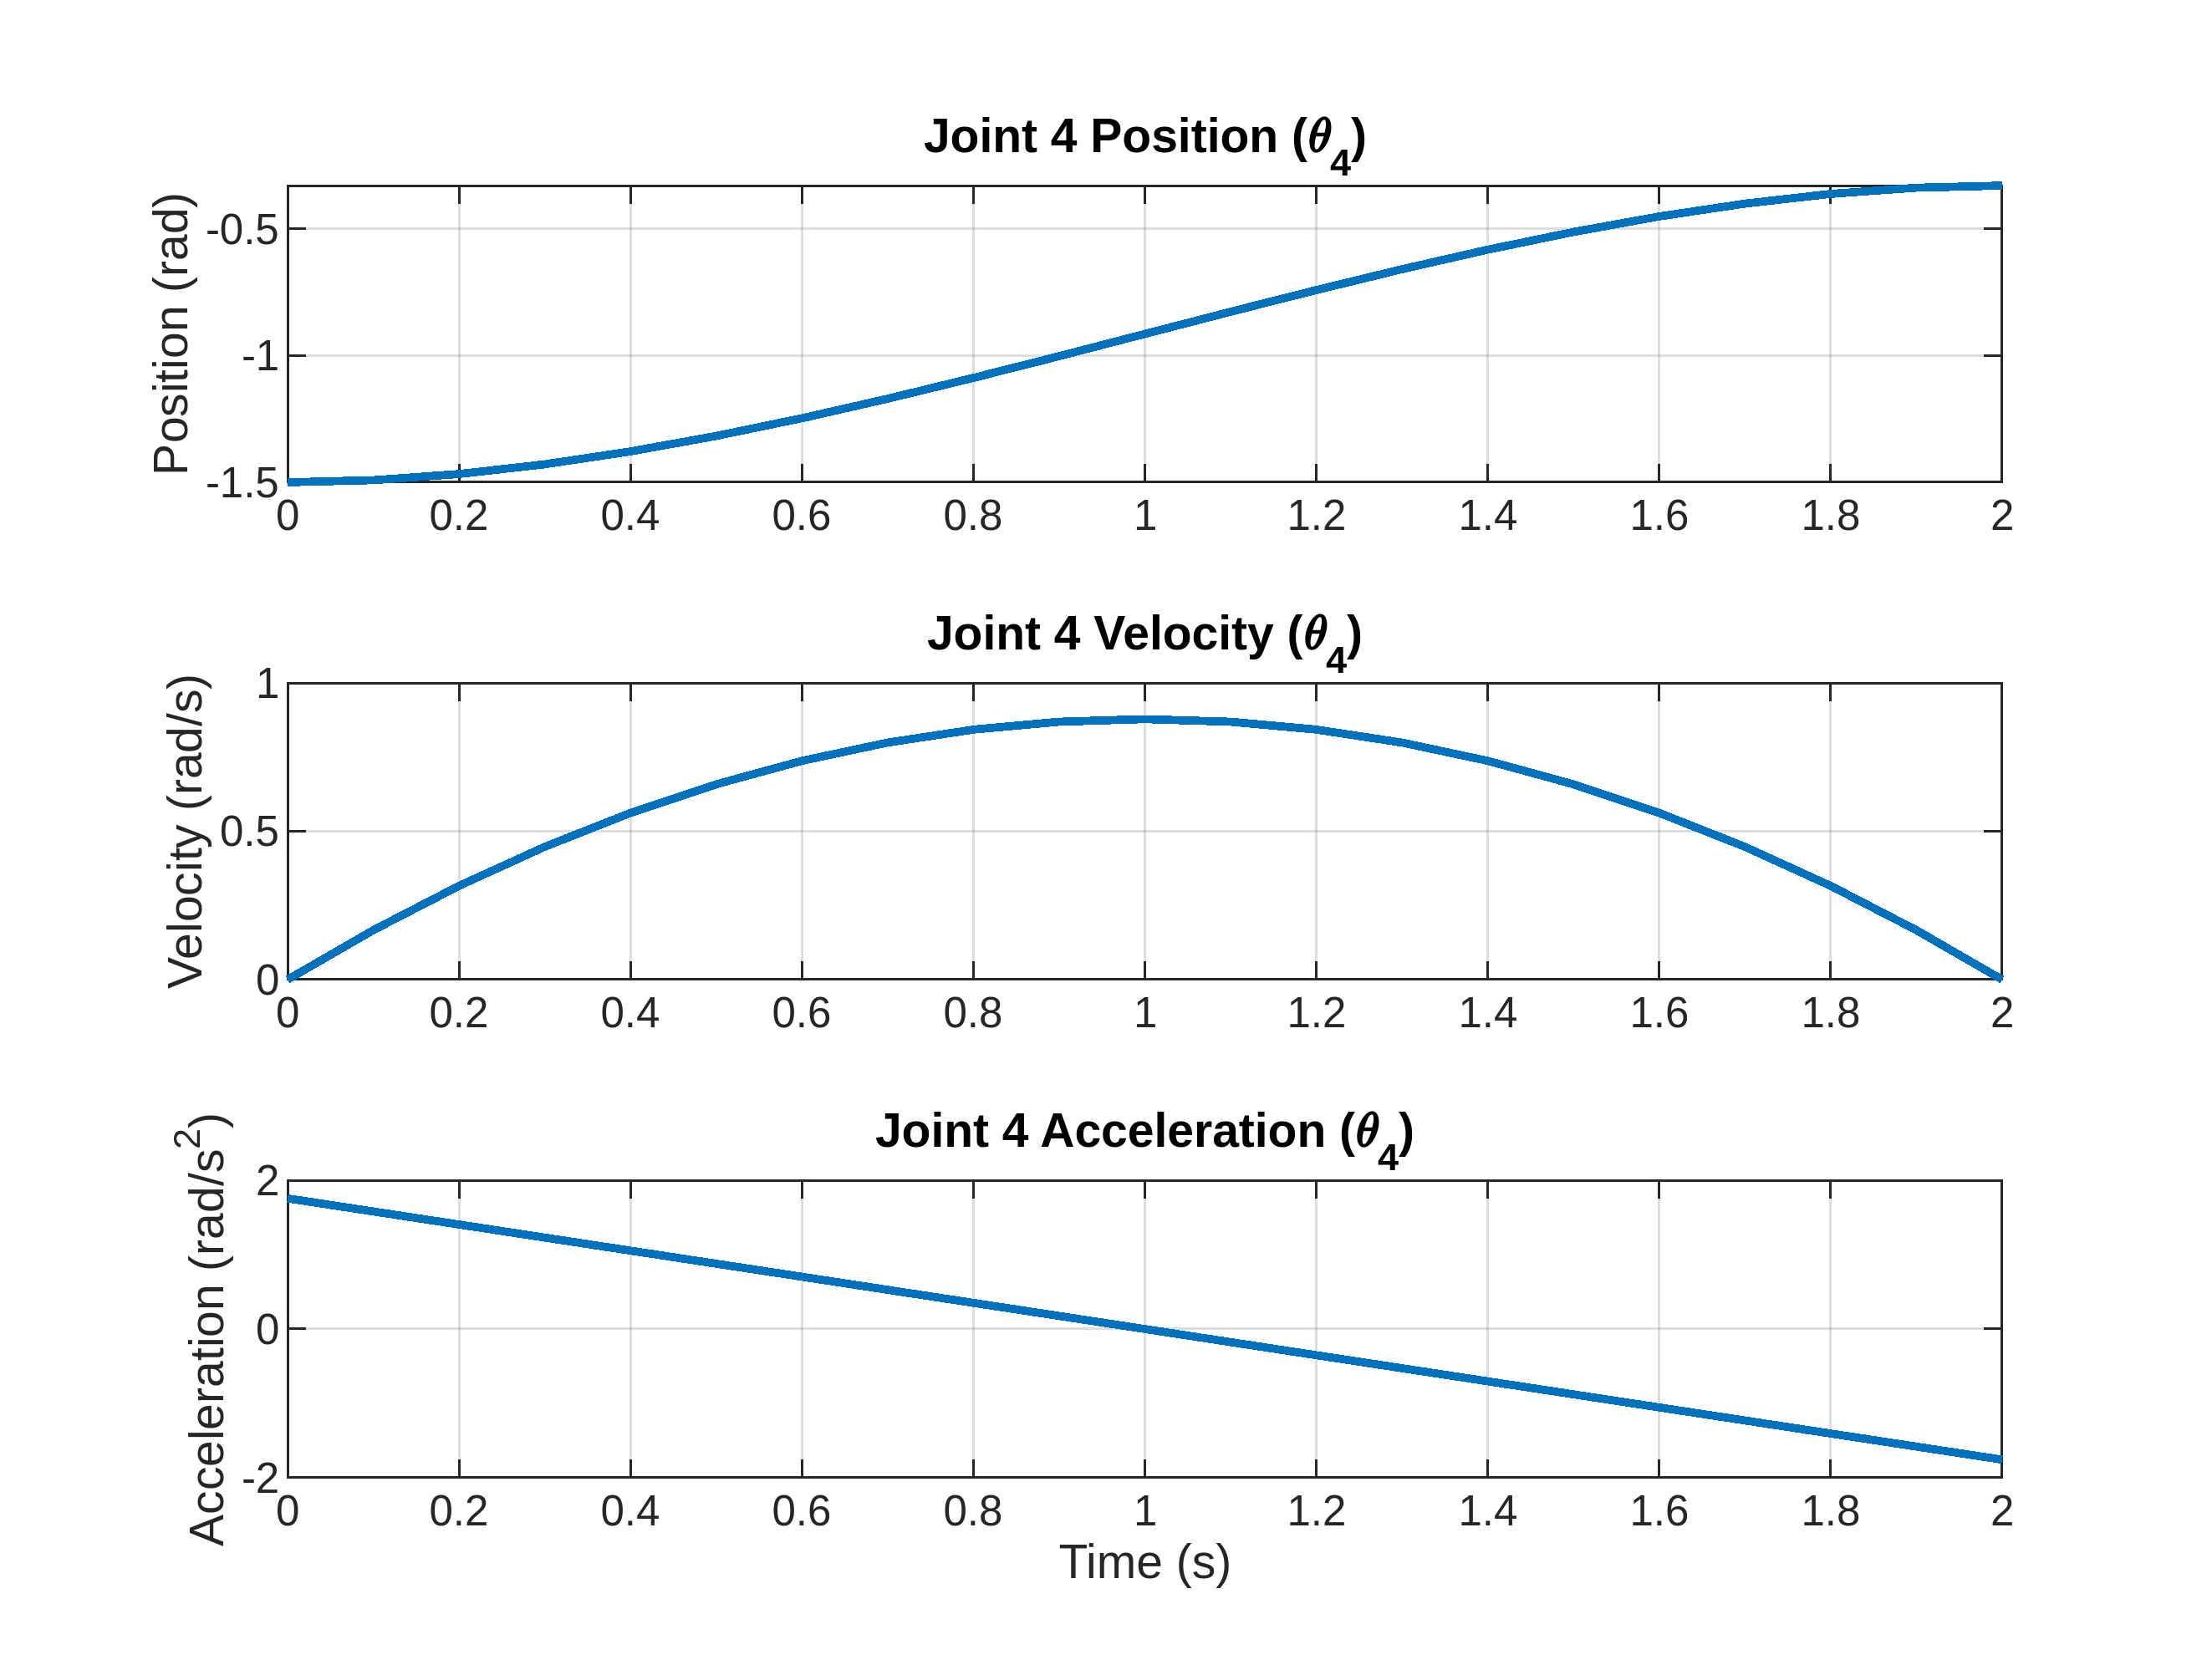

In [59]:
%% --- Plot Joint 4 (Theta4) ---
figure('Name','Joint 4 Trajectory','NumberTitle','off')

subplot(3,1,1)
plot(t, theta4_traj, 'LineWidth', 1.5)
title('Joint 4 Position (\theta_4)')
ylabel('Position (rad)')
grid on

subplot(3,1,2)
plot(t, theta4_vel, 'LineWidth', 1.5)
title('Joint 4 Velocity (\theta_4)')
ylabel('Velocity (rad/s)')
grid on

subplot(3,1,3)
plot(t, theta4_acc, 'LineWidth', 1.5)
title('Joint 4 Acceleration (\theta_4)')
ylabel('Acceleration (rad/s^2)')
xlabel('Time (s)')
grid on


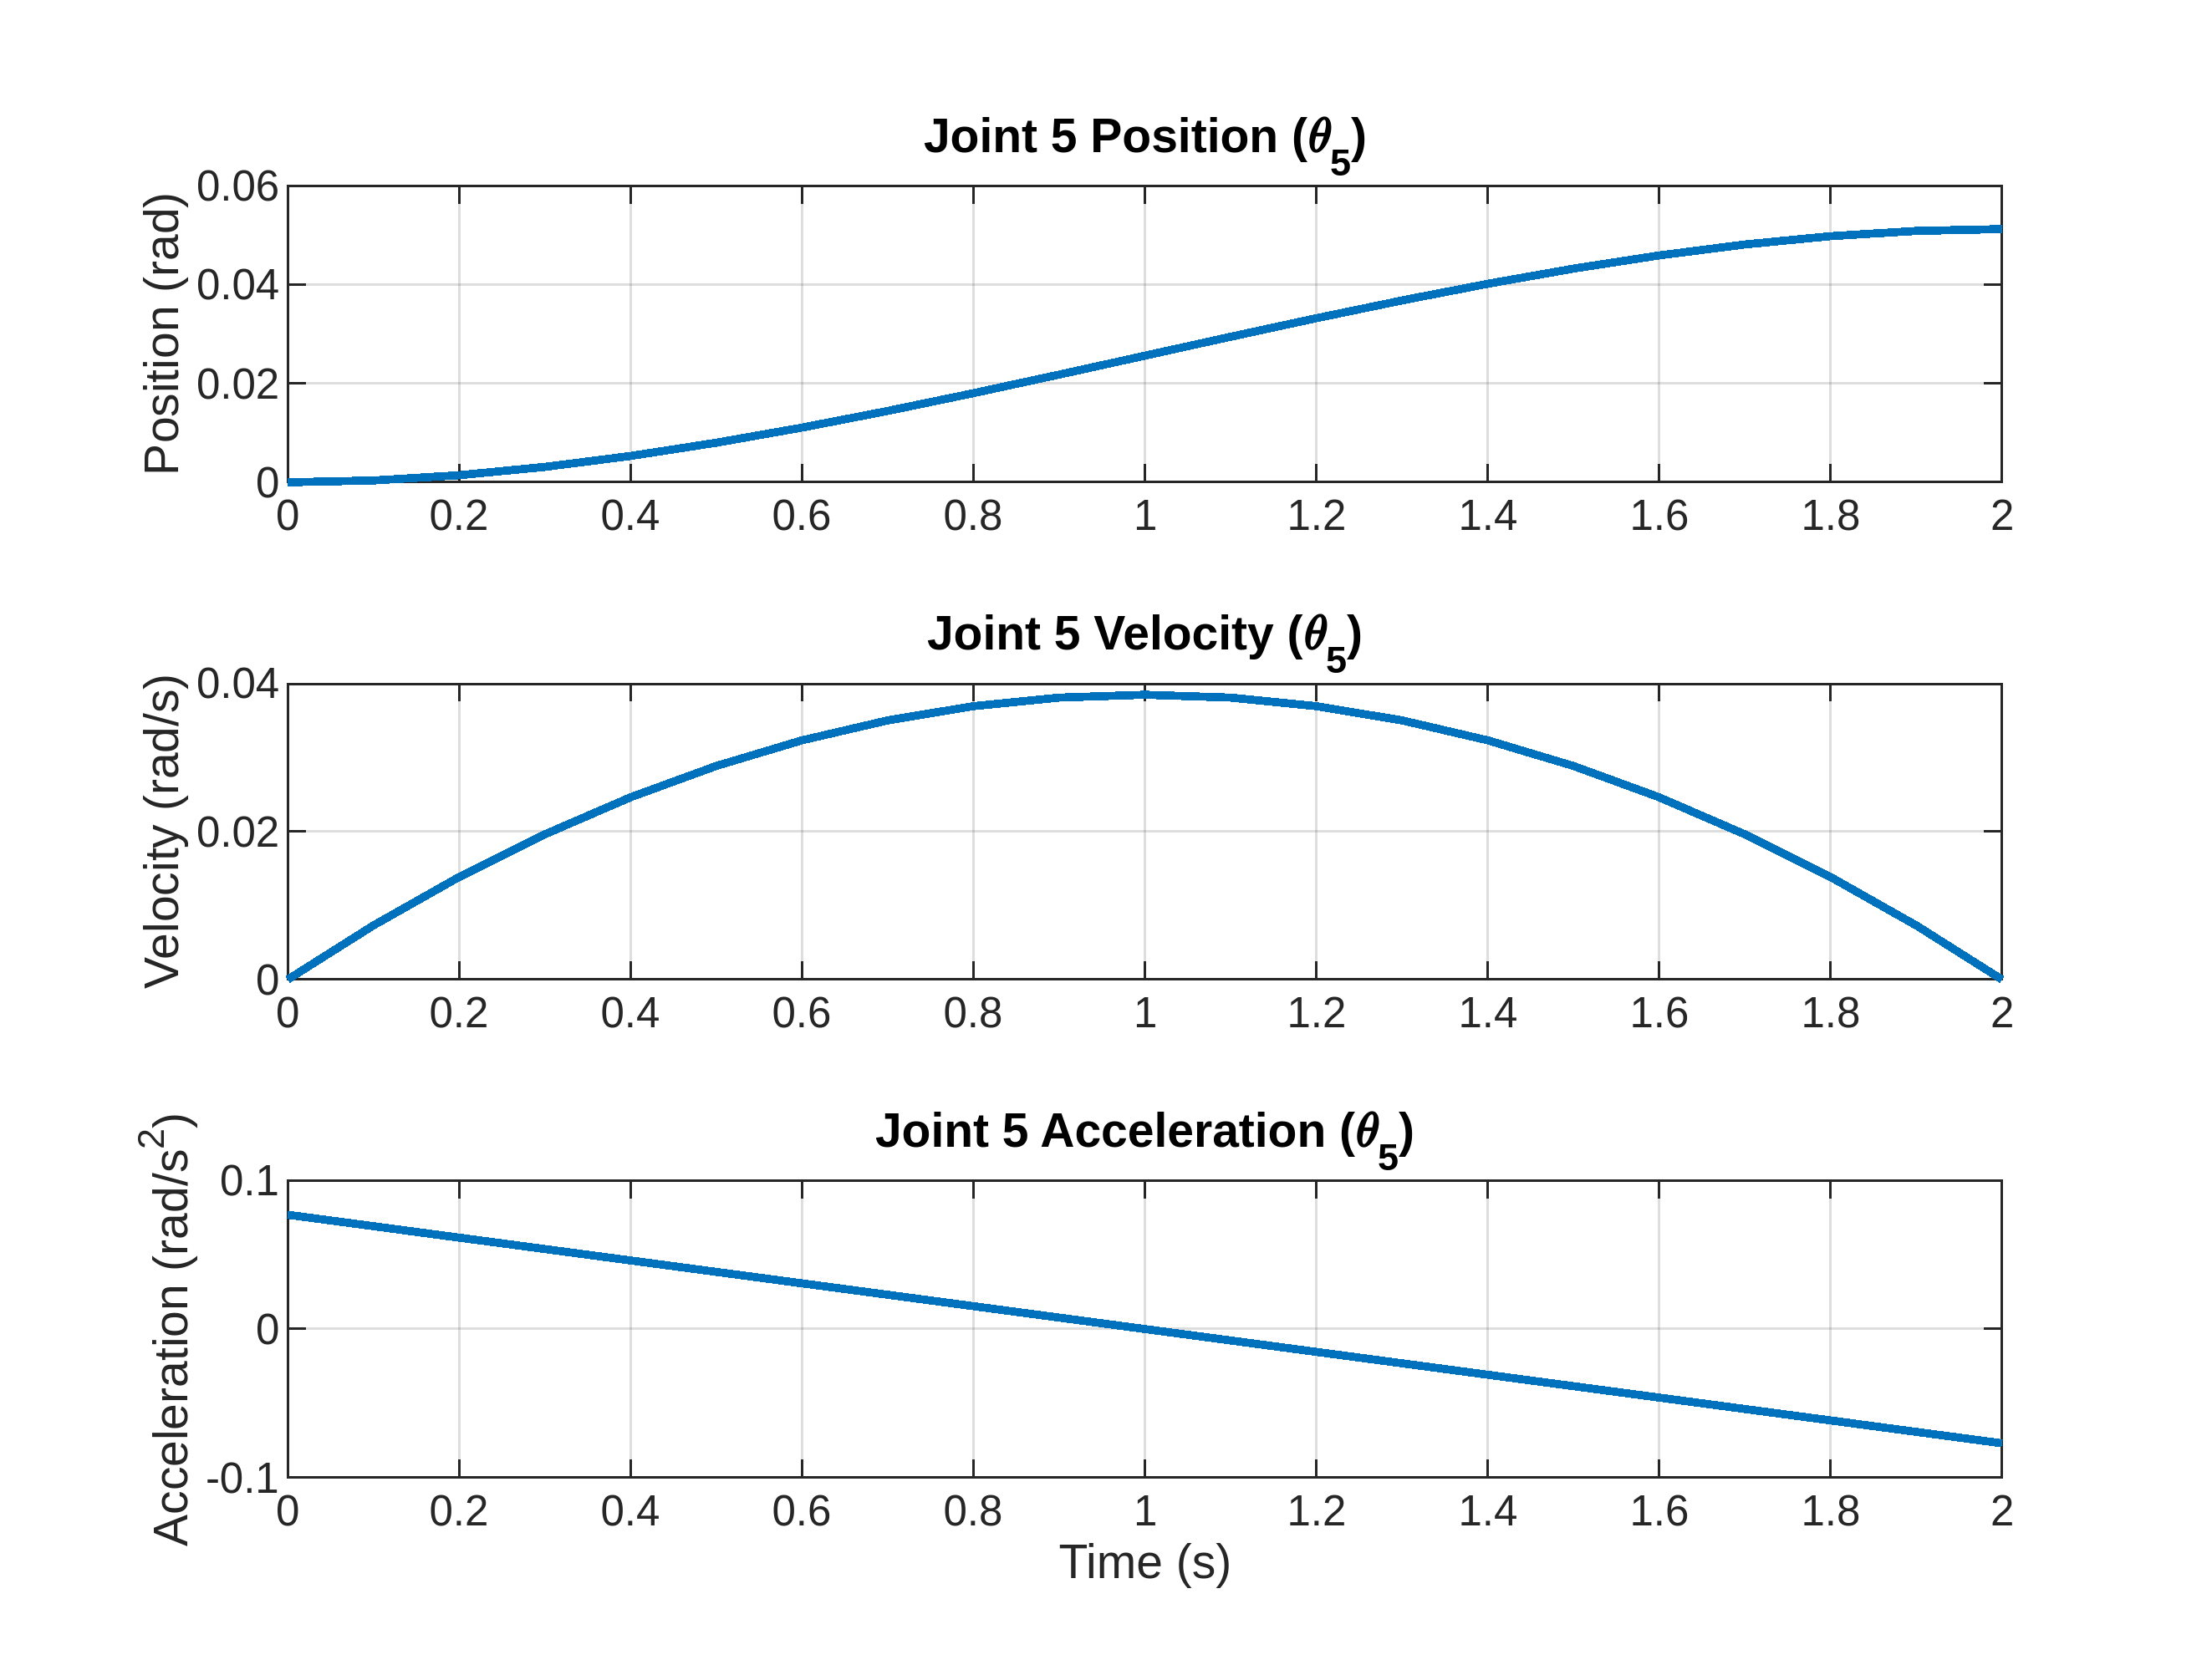

In [60]:
%% --- Plot Joint 5 (Theta5) ---
figure('Name','Joint 5 Trajectory','NumberTitle','off')

subplot(3,1,1)
plot(t, theta5_traj, 'LineWidth', 1.5)
title('Joint 5 Position (\theta_5)')
ylabel('Position (rad)')
grid on

subplot(3,1,2)
plot(t, theta5_vel, 'LineWidth', 1.5)
title('Joint 5 Velocity (\theta_5)')
ylabel('Velocity (rad/s)')
grid on

subplot(3,1,3)
plot(t, theta5_acc, 'LineWidth', 1.5)
title('Joint 5 Acceleration (\theta_5)')
ylabel('Acceleration (rad/s^2)')
xlabel('Time (s)')
grid on

In [61]:
%%**************** End *****************%%